In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import numpy as np

In [ ]:
uploaded = files.upload()  # Prompts user to upload an image
image_path = list(uploaded.keys())[0]  # Gets the uploaded file name


Saving road_image.png to road_image (1).png


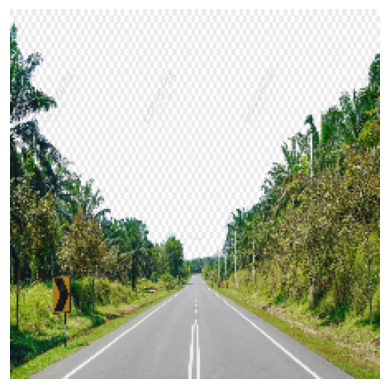

In [ ]:
# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Resize image to 224x224
resized_image = cv2.resize(image, (224, 224))

# Display the resized image
plt.imshow(resized_image)
plt.axis("off")
plt.show()


In [ ]:
output_path = "resized_image.jpg"
cv2.imwrite(output_path, cv2.cvtColor(resized_image, cv2.COLOR_RGB2BGR))

# Download the resized image
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
# Load the resized image (assuming it's named 'resized_image.jpg')
image_path = "resized_image.jpg"
image = Image.open(image_path).convert("RGB")  # Convert to RGB


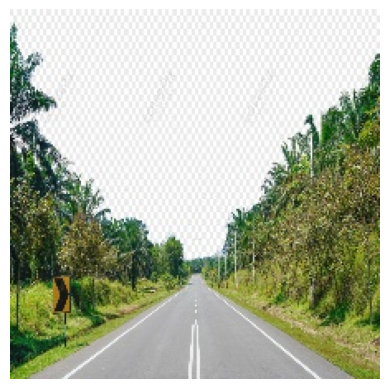

In [ ]:
# Define normalization parameters (for ViTs trained on ImageNet)
mean = [0.5, 0.5, 0.5]  # Mean for R, G, B channels
std = [0.5, 0.5, 0.5]  # Standard deviation for R, G, B channels

# Define PyTorch transformation
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor (values between 0 and 1)
    transforms.Normalize(mean=mean, std=std)  # Apply normalization
])

# Apply transformation
normalized_image = transform(image)

# Convert back to NumPy for visualization
normalized_image_np = normalized_image.permute(1, 2, 0).numpy()  # Reorder dimensions

# Denormalize for visualization (optional)
denormalized_image = (normalized_image_np * std) + mean
denormalized_image = np.clip(denormalized_image, 0, 1)  # Clip values to valid range

# Display the normalized image
plt.imshow(denormalized_image)
plt.axis("off")
plt.show()


In [ ]:
# Convert normalized tensor back to an image (for saving)
normalized_image_np = ((normalized_image.permute(1, 2, 0).numpy() * std) + mean) * 255  # Convert back to 0-255 range
normalized_image_np = np.clip(normalized_image_np, 0, 255).astype(np.uint8)  # Clip values & convert to uint8

# Save the image
output_path = "normalized_image.jpg"
cv2.imwrite(output_path, cv2.cvtColor(normalized_image_np, cv2.COLOR_RGB2BGR))

# Download the normalized image
from google.colab import files
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>